# Data Analysis

Found this data on the eirgrid website represents all of Ireland. Some prelimenary analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
width = 426.79135

In [2]:
#Bring in the raw data, year by year
df_14_15 = pd.read_excel('data/Eirgrid_data_14_15.xlsx', index_col=0) 
df_16_17 = pd.read_excel('data/Eirgrid_data_16_17.xlsx', index_col=0) 
df_18_19 = pd.read_excel('data/Eirgrid_data_18_19.xlsx', index_col=0) 
df_20_21 = pd.read_excel('data/Eirgrid_data_20_21.xlsx', index_col=0) 

In [3]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [4]:
#Join these years together for analysis
list_dfs = [df_14_15,df_16_17,df_18_19,df_20_21]
df = pd.concat(list_dfs) 

In [5]:
#Make the data hourly
df = df.resample('H').mean()
fake_news = df[df['IE Wind Availability'].isnull() == True]['IE Wind Availability']
fake_news = fake_news[fake_news.index.year.isin([2019])]
fake_news

DateTime
2019-03-31 01:00:00   NaN
2019-12-01 00:00:00   NaN
2019-12-01 01:00:00   NaN
2019-12-01 02:00:00   NaN
2019-12-01 03:00:00   NaN
                       ..
2019-12-31 19:00:00   NaN
2019-12-31 20:00:00   NaN
2019-12-31 21:00:00   NaN
2019-12-31 22:00:00   NaN
2019-12-31 23:00:00   NaN
Name: IE Wind Availability, Length: 745, dtype: float64

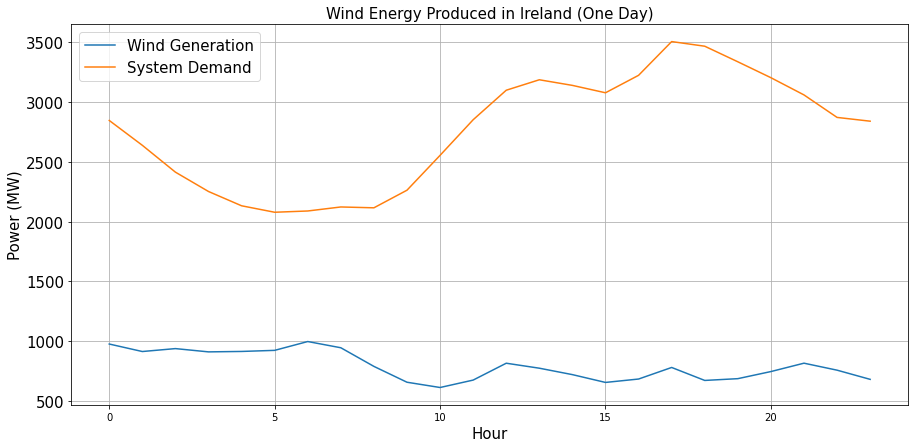

In [6]:
fig,ax = plt.subplots(figsize = [15,7])
ax.set_xlabel("Hour", fontsize = 15)
ax.set_ylabel("Power (MW)", fontsize = 15)
ax.grid(True)
plt.title('Wind Energy Produced in Ireland (One Day)', fontsize=15)
plt.yticks(fontsize= 15)
plt.plot(df.index[0:24].hour, df['IE Wind Generation'][0:24], label='Wind Generation')
plt.plot(df.index[0:24].hour, df['IE Demand'][0:24], label='System Demand')
plt.legend(fontsize=15)
plt.show()

# Curtailment
- Wind generation never exceeds demand
- Wind availbility on the other hand does. Just don't know how to get curtailment from this data which would seem to be a large part of my project

In [7]:
#Grab from other dataframe for whole country
all_ireland = pd.DataFrame()
all_ireland['Wind Availability'] = df['IE Wind Availability']+df['NI Wind Availability']
all_ireland['Wind Generation'] = df['IE Wind Generation']+df['NI Wind Generation']
all_ireland['Demand'] = df['IE Demand']+ df['NI Demand']
all_ireland['Wind Generation'].max()

4436.64125

In [8]:
#This is how we've decided to perform the curtailment, seems sensible
all_ireland_curtail = (df['NI Wind Availability']+df['IE Wind Availability']-df['NI Wind Generation']-df['IE Wind Generation'])*100/(df['NI Wind Availability']+df['IE Wind Availability'])

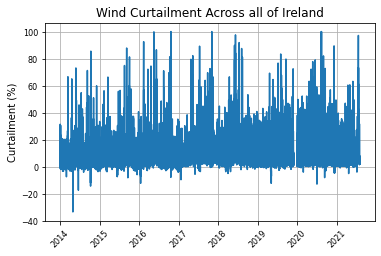

In [16]:
#plotting settings
fig,ax = plt.subplots(figsize=set_size(width))
ax.set_ylabel("Curtailment (%)", fontsize = 10)
ax.grid(True)
plt.xticks(fontsize= 8, rotation=45)
plt.title('Wind Curtailment Across all of Ireland', fontsize=12)
plt.yticks(fontsize= 8)
plt.plot(all_ireland_curtail.index, all_ireland_curtail, label='Curtailment')
fig.savefig('images/Curtaildata.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

In [10]:
all_ireland_curtail.mean()

7.433757768104553

# Price data

## DAM market

In [11]:
all_data = pd.read_csv('data/market_price.csv')

#Day ahead
dam_prices = all_data[all_data['auction'] == 'DAM']
dam_prices.index = pd.to_datetime(dam_prices['timestamp'])

#intraday 1
ida1_prices = all_data[all_data['auction'] == 'IDA1']
ida1_prices.index = pd.to_datetime(ida1_prices['timestamp'])

#intraday 2
ida2_prices = all_data[all_data['auction'] == 'IDA2']
ida2_prices.index = pd.to_datetime(ida2_prices['timestamp'])

#intraday 3
ida3_prices = all_data[all_data['auction'] == 'IDA3']
ida3_prices.index = pd.to_datetime(ida3_prices['timestamp'])

C:\Users\shane\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
ida3_prices

,auction,timestamp,price_eur,price_gbp,ni_vols,ni_netpos,roi_vols,roi_netpos,DeliveryDate,DeliveryHour,DeliveryInterval,semo_vols,doy,dow,week,dom,Month,year
timestamp,,,,,,,,,,,,,,,,,,
2018-10-01 16:00:00+00:00,IDA3,2018-10-01T16:00:00Z,61.62,55.008,1.5,1.2,25.5,-1.2,01/10/2018,19.0,1.0,27.0,274.0,1.0,40.0,1.0,Oct-18,2018.0
2018-10-01 16:30:00+00:00,IDA3,2018-10-01T16:30:00Z,65.00,58.025,3.7,3.2,27.4,-3.2,01/10/2018,19.0,2.0,31.1,274.0,1.0,40.0,1.0,Oct-18,2018.0
2018-10-01 17:00:00+00:00,IDA3,2018-10-01T17:00:00Z,65.00,58.025,1.1,0.3,23.8,-0.3,01/10/2018,20.0,1.0,24.9,274.0,1.0,40.0,1.0,Oct-18,2018.0
2018-10-01 17:30:00+00:00,IDA3,2018-10-01T17:30:00Z,66.73,59.570,1.8,0.5,22.9,-0.5,01/10/2018,20.0,2.0,24.7,274.0,1.0,40.0,1.0,Oct-18,2018.0
2018-10-01 18:00:00+00:00,IDA3,2018-10-01T18:00:00Z,74.98,66.934,1.8,-1.3,32.8,1.3,01/10/2018,21.0,1.0,34.6,274.0,1.0,40.0,1.0,Oct-18,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:30:00+00:00,IDA3,2020-12-31T20:30:00Z,58.00,52.498,2.9,2.1,65.4,-2.1,31/12/2020,22.0,2.0,68.3,366.0,4.0,53.0,31.0,Dec-20,2020.0
2020-12-31 21:00:00+00:00,IDA3,2020-12-31T21:00:00Z,63.00,57.024,3.4,-2.6,71.1,2.6,31/12/2020,23.0,1.0,74.5,366.0,4.0,53.0,31.0,Dec-20,2020.0
2020-12-31 21:30:00+00:00,IDA3,2020-12-31T21:30:00Z,45.00,40.731,3.1,2.1,89.7,-2.1,31/12/2020,23.0,2.0,92.8,366.0,4.0,53.0,31.0,Dec-20,2020.0


<ipython-input-15-ec487c990d3a>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels3, rotation=40, fontsize=8)
<ipython-input-15-ec487c990d3a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels4, rotation=40, fontsize=8)


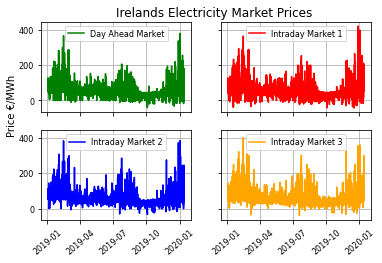

In [15]:
fig,([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows=2, ncols=2, figsize=set_size(width), sharex=True, sharey=True)
plt.rcParams['axes.grid'] = True

#plot each one
ax1.plot(dam_prices.index, dam_prices['price_eur'], label='Day Ahead Market', color='green')
ax2.plot(ida1_prices.index, ida1_prices['price_eur'], label='Intraday Market 1', color='red')
ax3.plot(ida2_prices.index, ida2_prices['price_eur'], label='Intraday Market 2', color='blue')
ax4.plot(ida3_prices.index, ida3_prices['price_eur'], label='Intraday Market 3', color='orange')

#apparently have to draw the canvas before it can get ticks?
fig.canvas.draw()

#Grab the labels
labels1 = ax1.get_xticklabels()
labels2 = ax2.get_xticklabels()
labels3 = ax3.get_xticklabels()
labels4 = ax4.get_xticklabels()

#have to rotate them cause they don't fit
ax1.set_xticklabels(labels1, rotation=40, fontsize=8)
ax2.set_xticklabels(labels2, rotation=40, fontsize=8)
ax3.set_xticklabels(labels3, rotation=40, fontsize=8)
ax4.set_xticklabels(labels4, rotation=40, fontsize=8)

ax3.xaxis.set_major_locator(plt.MaxNLocator(6))
ax4.xaxis.set_major_locator(plt.MaxNLocator(6))

ax1.tick_params(axis='y', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
ax3.tick_params(axis='y', labelsize=8)
ax4.tick_params(axis='y', labelsize=8)

ax1.legend(loc='upper center', fontsize=8)
ax2.legend(loc='upper center', fontsize=8)
ax3.legend(loc='upper center', fontsize=8)
ax4.legend(loc='upper center', fontsize=8)

fig.text(0.045, 0.45, "Price €/MWh", fontsize=10, rotation='vertical')
fig.text(0.3, 0.9, "Irelands Electricity Market Prices", fontsize=12)
fig.savefig('images/markeprice.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

In [14]:
#print the average price of each
print('Average price of dam is: €{}'.format(dam_prices['price_eur'].mean()))
print('Average price of ida1 is: €{}'.format(ida1_prices['price_eur'].mean()))
print('Average price of ida2 is: €{}'.format(ida2_prices['price_eur'].mean()))
print('Average price of ida3 is: €{}'.format(ida3_prices['price_eur'].mean()))


Average price of dam is: €47.10219855211881
Average price of ida1 is: €46.302560598390016
Average price of ida2 is: €53.677589669505075
Average price of ida3 is: €58.93054424868341
